In [126]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats as stats


In [127]:
# Task 1

gamma_top=1.33
m_top=173
interval=(170, 176)

In [128]:
def Cauchy(x, x_0, gamma):
    return 1/(np.pi*gamma)*gamma**2/((x-x_0)**2+gamma**2)

In [129]:
def Gauss(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

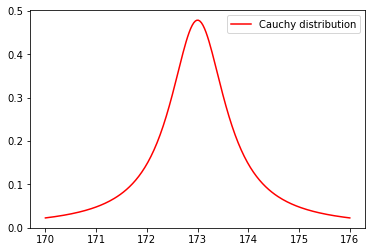

In [130]:
Interval=np.linspace(170, 176, 200)

plt.plot(Interval, Cauchy(Interval, m_top, gamma_top/2), c='r',label="Cauchy distribution")
plt.legend()

In [131]:
gen=np.random.default_rng()
n=2000

x=gen.uniform(*interval, n)
y=gen.uniform(0, 0.5, n)

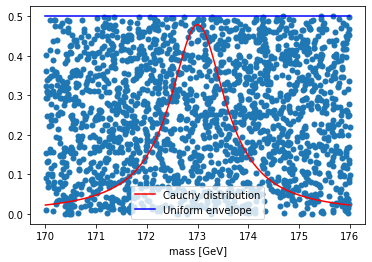

In [132]:
plt.plot(Interval, Cauchy(Interval, m_top, gamma_top/2), c='r',label="Cauchy distribution")
plt.scatter(x, y, lw=0.01)
plt.plot(Interval, np.full(200, 0.5), label="Uniform envelope", c='b')
plt.xlabel("mass [GeV]")
plt.legend()


In [133]:
ok = (y<Cauchy(x, m_top, gamma_top/2)) 
x_ok=x[ok]
y_ok=y[ok]
x_nok=x[np.invert(ok)]
y_nok=y[np.invert(ok)]

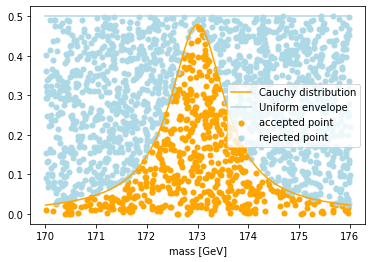

In [134]:
plt.plot(Interval, Cauchy(Interval, m_top, gamma_top/2), c='orange',label="Cauchy distribution")
plt.scatter(x_ok, y_ok, lw=0.01, c='orange', label='accepted point')
plt.scatter(x_nok, y_nok, lw=0.01, c='lightblue', label='rejected point')
plt.plot(Interval, np.full(200, 0.5), label="Uniform envelope", c='lightblue')
plt.xlabel("mass [GeV]")
plt.legend()

In [135]:
print("Acceptance rate: {}".format(len(x_ok) / len(x)))

Acceptance rate: 0.2755


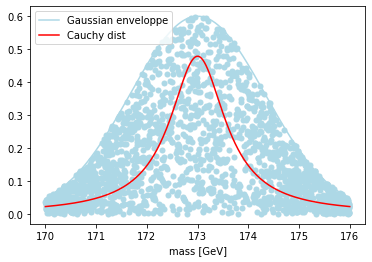

In [151]:
xg=gen.uniform(*interval, n)
yg=gen.uniform(0, 1, n)*2*Gauss(xg, m_top, gamma_top)

plt.plot(Interval, 2*Gauss(Interval, m_top, gamma_top), c='lightblue',label="Gaussian enveloppe")
plt.scatter(xg, yg, lw=0.01, c='lightblue')
plt.plot(Interval, Cauchy(Interval, m_top, gamma_top/2), label="Cauchy dist", c='r')
plt.xlabel("mass [GeV]")
plt.legend()

In [152]:
okg = (yg<Cauchy(xg, m_top, gamma_top/2)) 
xg_ok=xg[okg]
yg_ok=yg[okg]
xg_nok=xg[np.invert(okg)]
yg_nok=yg[np.invert(okg)]

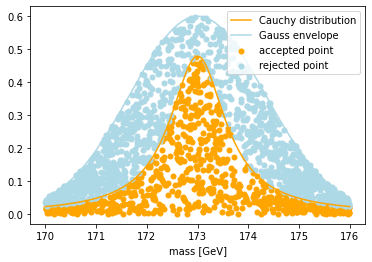

In [169]:
plt.plot(Interval, Cauchy(Interval, m_top, gamma_top/2), c='orange',label="Cauchy distribution")
plt.scatter(xg_ok, yg_ok, lw=0.01, c='orange', label='accepted point')
plt.scatter(xg_nok, yg_nok, lw=0.01, c='lightblue', label='rejected point')
plt.plot(Interval, 2*Gauss(Interval, m_top, gamma_top), label="Gauss envelope", c='lightblue')
plt.xlabel("mass [GeV]")
plt.legend()

In [154]:
print("Acceptance rate: {}".format(len(xg_ok) / len(xg)))

Acceptance rate: 0.378


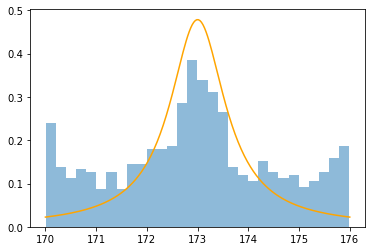

In [158]:
#Task 2
n_bins=30
plt.hist(xg_ok, bins=n_bins, density=True, alpha=0.5)
plt.plot(Interval, Cauchy(Interval, m_top, gamma_top/2), c='orange',label="Cauchy distribution")


In [159]:
weights_ok=2 * Gauss(xg_ok, m_top, gamma_top)*n_bins/n

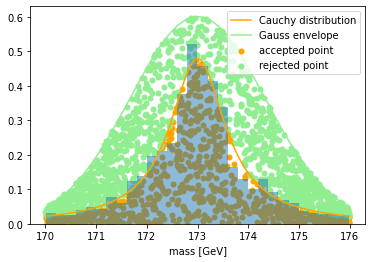

In [168]:
plt.plot(Interval, Cauchy(Interval, m_top, gamma_top/2), c='orange',label="Cauchy distribution")
plt.scatter(xg_ok, yg_ok, lw=0.01, c='orange', label='accepted point')
plt.scatter(xg_nok, yg_nok, lw=0.01, c='lightgreen', label='rejected point')
plt.plot(Interval, 2*Gauss(Interval, m_top, gamma_top), label="Gauss envelope", c='lightgreen')
contents, bin_edges, _= plt.hist(xg_ok, weights=weights_ok, bins=n_bins, alpha=0.5)
plt.xlabel("mass [GeV]")
plt.legend()

In [172]:
Cauchy_int_est=np.sum(contents)*(bin_edges[-1] - bin_edges[0]) / n_bins
Cauchy_int_est

0.8484015446704745

In [175]:
import scipy.integrate as integrate

integrate.quad(lambda x: Cauchy(x, m_top, gamma_top/2), 170, 176)[0]

0.8611280990752312